In [6]:
import sys
import os
sys.path.append(r"D:\CursorProj\Chem-Ontology-Constructor")
os.environ["PROJECT_ROOT"] = "D:\\CursorProj\\Chem-Ontology-Constructor\\"

from owlready2 import *
from autonogy_constructor.idea.workflow import create_workflow
from config.settings import ONTOLOGY_CONFIG
# 加载本体文件
onto1 = ONTOLOGY_CONFIG["ontology"]
onto2 = None #      get_ontology("data/ontology/test.owl").load() # 可选的第二个本体

In [7]:
from autonogy_constructor.idea.query_team.query_workflow import create_query_graph
from autonogy_constructor.idea.dreamer_team.dreamer_workflow import create_dreamer_graph
from autonogy_constructor.idea.critic_team.critic_workflow import create_critic_graph

query_graph = create_query_graph()
dreamer_graph = create_dreamer_graph()
critic_graph = create_critic_graph()



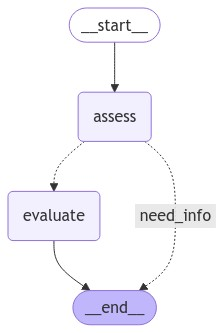

In [8]:
from IPython.display import Image, display

display(Image(critic_graph.get_graph().draw_mermaid_png()))

In [9]:
test = {
            "stage": "querying",
            "previous_stage": None,
            "source_ontology": onto1,
            "target_ontology": onto2,
            "analysis_type": "cross_domain" if onto2 else "single_domain",
            "shared_context": {
                "info": {},
                "ontology_analysis": {},
                "evaluations": [],
                "research_ideas": []
            },
            "query_results": {},
            "status": "initialized",
            "messages": [],
            "needs_improvement": False,
            "current_idea": None,
            "idea_evaluations": [],
            "gap_analysis": {},
            "query_interface": None,
            "query_requests": [],
            "ontology_analysis": {},
            "research_ideas": [],
            "error": None
        }

In [10]:
# 创建工作流 - 单领域分析
workflow = create_workflow(source_ontology=onto1)

# 运行工作流
result = workflow.invoke(test)

# 查看分析结果
print("\n=== 领域结构分析 ===")
domain_analysis = result["domain_analysis"]
print(f"核心概念: {domain_analysis['core_concepts']}")
print(f"关键模式: {domain_analysis['key_patterns']}")
print(f"属性分析: {domain_analysis['property_analysis']}")

print("\n=== 研究缝隙分析 ===")
gaps = result["gaps"]
print("\n证据缝隙:")
for gap in gaps["evidence"]:
    print(f"- {gap['property_name']}: {gap['reason']}")
    
print("\n知识缝隙:")
for gap in gaps["knowledge"]:
    print(f"- {gap['conflict_type']}: {gap['chemical_basis']}")

InvalidUpdateError: Expected dict, got dream
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [ ]:
# 创建工作流 - 跨领域分析
workflow = create_workflow(source_ontology=onto1, target_ontology=onto2)

# 运行工作流
result = workflow.invoke({})

# 查看跨领域分析结果
print("\n=== 跨领域分析 ===")
cross_domain = result["domain_analysis"]["cross_domain"]
print("\n概念对应:")
for analogy in cross_domain["analogies"]:
    print(f"- {analogy['source_concept']} <-> {analogy['target_concept']}")
    
print("\n方法论差异:")
for diff in cross_domain["method_differences"]:
    print(f"- {diff['aspect']}: {diff['description']}")
    
print("\n迁移机会:")
for opp in cross_domain["transfer_opportunities"]:
    print(f"- {opp['name']}: {opp['description']}")

In [ ]:
from autonogy_constructor.idea.query_team.ontology_tools import OntologyAnalyzer

analyzer = OntologyAnalyzer()
opportunities = analyzer.get_research_opportunities(result["domain_analysis"])

print("\n=== 研究机会 ===")
for opp in opportunities:
    print(f"\n类型: {opp['type']}")
    if opp['type'] == 'concept_based':
        print(f"概念: {opp['concept']}")
        print(f"机会: {opp['opportunity']}")
    elif opp['type'] == 'transfer':
        print(f"来源: {opp['source']}")
        print(f"目标: {opp['target']}")
        print(f"描述: {opp['description']}")
    elif opp['type'] == 'innovation':
        print(f"创新点: {opp['title']}")
        print(f"描述: {opp['description']}")

In [ ]:
import json
from datetime import datetime

# 保存完整结果
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
with open(f'analysis_result_{timestamp}.json', 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=2)

# 保存研究机会
with open(f'research_opportunities_{timestamp}.json', 'w', encoding='utf-8') as f:
    json.dump(opportunities, f, ensure_ascii=False, indent=2)